In [3]:
import numpy as np
import math
import control as ct
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy as sp
import matplotlib.animation as manimation


The following cell sets up the background of the video

C:\Users\omar5\AppData\Local\Temp\ipykernel_11292\2271524348.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cloud_data[ii,0] = xx
C:\Users\omar5\AppData\Local\Temp\ipykernel_11292\2271524348.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cloud_data[ii,1] = yy
C:\Users\omar5\AppData\Local\Temp\ipykernel_11292\2271524348.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cloud_data[ii,2] = ss


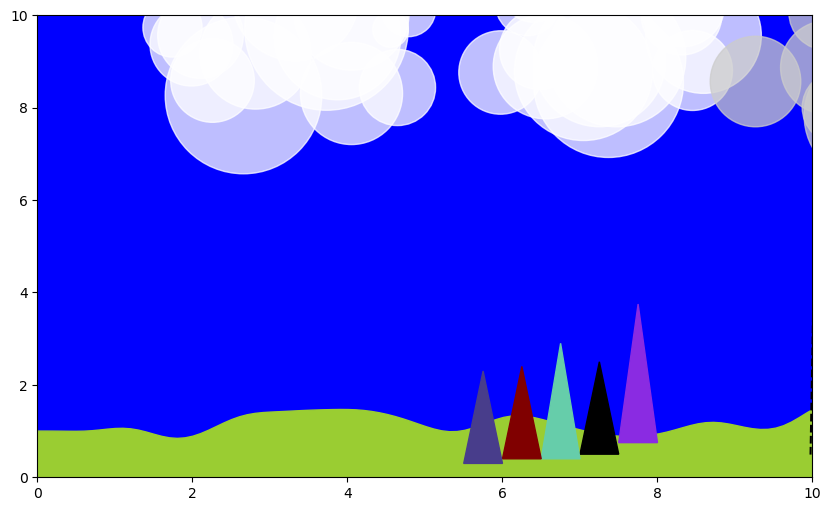

In [4]:
def make_cloud(ax, x0, y0, cc):
    vec_sizes = np.array([40, 50, 60, 70, 80, 90, 100, 100, 90, 80, 70, 60, 50, 40])
    cloud_data = np.zeros((14,3))
    for ii in range(14):
        xx = x0-0.25*ii-0.25*np.random.randn(1)
        yy = y0+np.random.randn(1)
        ss = vec_sizes[ii]+np.random.randn(1)*10 
        cloud_data[ii,0] = xx
        cloud_data[ii,1] = yy
        cloud_data[ii,2] = ss
        ax.plot(xx,yy,'o',markersize=ss,color=cc,alpha=0.75)
    return cloud_data

def make_ground(ax, N):
    b1, a1 = sp.signal.butter(5, 0.1, 'low')
    g = 1*sp.signal.lfilter(b1, a1, np.random.randn(N)) + 1
    xx = np.linspace(0, N/10, N) 
    ax.fill_between(xx,g, color='yellowgreen')
    return xx, g

def make_building(ax, xx, yy, ww, hh, cc, crash_plane):
    rect = patches.Rectangle((xx, yy), ww, hh, linewidth=1, edgecolor=cc, facecolor=cc)
    window_y = np.linspace(yy+0.2,yy+hh-0.2,5)
    window_x = np.linspace(xx+0.1,xx+ww-0.1,3)
    win_grid_x, win_grid_y = np.meshgrid(window_x,window_y)
    ax.plot(win_grid_x,win_grid_y,'s', color='yellow')
    ax.add_patch(rect)
    crash_plane[int(xx*10):int((xx+ww)*10)] = yy+hh
    return rect, crash_plane

def make_mountain(ax, xx, yy, ww, hh, cc, crash_plane):
    points = np.zeros((3,2))
    points[0,:] = [xx,yy]
    points[1,:] = [xx+ww,yy]
    points[2,:] = [xx+ww/2,yy+hh]
    tri = patches.Polygon(points, linewidth=1, edgecolor=cc, facecolor=cc, closed=True)
    ax.add_patch(tri)
    mountain_plane = np.zeros(int(ww*10))
    mountain_plane[0:int(ww*10/2)+1] = yy + 2*hh/ww*np.linspace(0,ww/2,int(10*ww/2)+1)
    temp = yy+hh - 2*hh/ww*np.linspace(0,ww/2,int(np.round(10*ww/2))+1)
    mountain_plane[int(ww*10/2)+1:int(ww*10)] = temp[1:len(temp)]
    crash_plane[int(xx*10):int((xx+ww)*10)] = np.maximum(crash_plane[int(xx*10):int((xx+ww)*10)],mountain_plane)
    return tri, crash_plane

def make_rain(ax, xx1, xx2, yy1, yy2, intensity):
    xx0_a = xx1
    while xx0_a < xx2:
        xx0 = xx0_a+intensity*np.random.randn(1)
        yy0_a = yy1+0.1*np.random.randn(1)
        yy0_b = yy2+0.1*np.random.randn(1)
        ax.plot([xx0, xx0+intensity*np.random.randn(1)+intensity*5], [yy0_a, yy0_b], 'k--' )
        xx0_a += 0.1
    


fig, ax = plt.subplots(1, figsize=(10,6))
ax.set_facecolor('blue')
ax.set_xlim(0,10)
ax.set_ylim(0,10)

N = 350
make_rain(ax, 10, 12, 0.5, 9, 0.02)
make_rain(ax, 17, 19, 0.5, 9, 0.08)
make_rain(ax, 21, 23, 0.5, 9, 0.12)
make_rain(ax, 26, 28, 0.5, 9, 0.16)
make_rain(ax, 29, 31, 0.5, 9, 0.2)
cloud1 = make_cloud(ax, 5, 9, [1, 1, 1])
cloud2 = make_cloud(ax, 9, 9, [1, 1, 1])
cloud3 = make_cloud(ax, 13, 9, [0.8, 0.8, 0.8])
cloud4 = make_cloud(ax, 20, 9, [0.6, 0.6, 0.6])
cloud5 = make_cloud(ax, 24, 9, [0.4, 0.4, 0.4])
cloud6 = make_cloud(ax, 29, 9, [0.2, 0.2, 0.2])
cloud7 = make_cloud(ax, 32, 9, [0.1, 0.1, 0.1])

xx,ground = make_ground(ax, N)
crash_plane = ground
building1, crash_plane = make_mountain(ax,7.5,0.75,0.5,3,'blueviolet', crash_plane)
building2, crash_plane = make_mountain(ax,7,0.5,0.5,2,[0,0,0], crash_plane)
building3, crash_plane = make_mountain(ax,6.5,0.4,0.5,2.5,'mediumaquamarine', crash_plane)
building4, crash_plane = make_mountain(ax,6,0.4,0.5,2,'maroon', crash_plane)
building5, crash_plane = make_mountain(ax,5.5,0.3,0.5,2,'darkslateblue', crash_plane)

building6, crash_plane = make_mountain(ax,14.5, 0.5, 0.5, 3,'goldenrod', crash_plane)
building7, crash_plane = make_mountain(ax,14, 0.4, 0.5, 4,'tomato', crash_plane)
building8, crash_plane = make_mountain(ax,13.5, 0.6, 0.5, 2.5,'orchid', crash_plane)
building9, crash_plane = make_mountain(ax,13, 0.6, 0.5, 3,'pink', crash_plane)
building10, crash_plane = make_mountain(ax,12.5, 0.5, 0.5, 3,'dodgerblue', crash_plane)

building11, crash_plane = make_mountain(ax,25.5, 0.5, 0.5, 2.5,'silver', crash_plane)
building12, crash_plane = make_mountain(ax,25, 0.4, 0.5, 3.5,'indigo', crash_plane)
building13, crash_plane = make_mountain(ax,24.5, 0.6, 0.5, 3,'chartreuse', crash_plane)
building14, crash_plane = make_mountain(ax,24, 0.6, 0.5, 4,'cyan', crash_plane)
building15, crash_plane = make_mountain(ax,23.5, 0.5, 0.5, 3,'hotpink', crash_plane)

building16, crash_plane = make_mountain(ax,32.5, 0.5, 0.5, 3,'khaki', crash_plane)
building17, crash_plane = make_mountain(ax,32, 0.4, 0.5, 4,'mediumvioletred', crash_plane)
building18, crash_plane = make_mountain(ax,31.5, 0.6, 0.5, 2.5,'powderblue', crash_plane)
building19, crash_plane = make_mountain(ax,31, 0.6, 0.5, 3,'darkslategray', crash_plane)
building20, crash_plane = make_mountain(ax,30.5, 0.5, 0.5, 4.5,'gold', crash_plane)


# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Lead and Lag Compensators', artist='Matplotlib',
                comment='visualize lead and lag compensators')
writer = FFMpegWriter(fps=30, metadata=metadata)



The following cell defines the reference, disturbance and sensor noise signals. 

Text(0.5, 1.0, 'Disturbance')

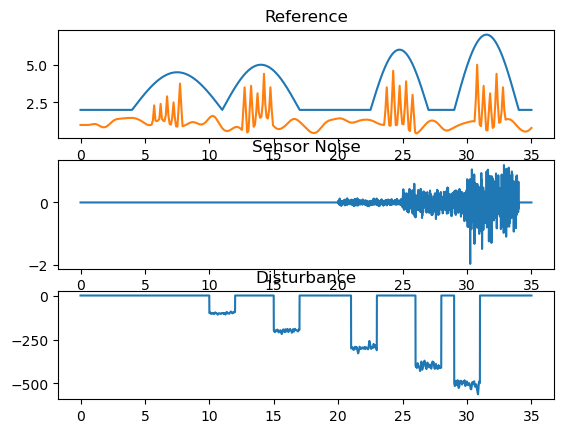

In [5]:
N2 = N*10
t2 = np.linspace(0,N/10,N2)
t1 = np.linspace(0,N/10,N)
b1, a1 = sp.signal.butter(2, 0.1, 'low')

r = 2*np.ones(N2)
r[400:1100] = 2.5*np.sin(2*np.pi/14*t2[0:700]) + 2
r[1100:1700] = 3*np.sin(2*np.pi/12*t2[0:600]) + 2
r[2250:2700] = 4*np.sin(2*np.pi/9*t2[0:450]) + 2
r[2900:3400] = 5*np.sin(2*np.pi/10*t2[0:500]) + 2

d = np.zeros(N2)
d[1000:1200] = 10*sp.signal.lfilter(b1, a1, np.random.randn(200))  - 100
d[1500:1700] = 20*sp.signal.lfilter(b1, a1, np.random.randn(200))  - 200
d[2100:2300] = 30*sp.signal.lfilter(b1, a1, np.random.randn(200))  - 300
d[2600:2800] = 40*sp.signal.lfilter(b1, a1, np.random.randn(200))  - 400
d[2900:3100] = 50*sp.signal.lfilter(b1, a1, np.random.randn(200))  - 500


n = np.zeros(N2)
n[2000:2500] = 0.05*np.random.randn(500)
n[2500:3000] = 0.2*np.random.randn(500)
n[3000:3400] = 0.5*np.random.randn(400)

fig2,ax2 = plt.subplots(3,1)
ax2[0].plot(t2,r)
ax2[0].set_title('Reference')
ax2[0].plot(t1,crash_plane)
ax2[1].plot(t2,n)
ax2[1].set_title('Sensor Noise')
ax2[2].plot(t2,d)
ax2[2].set_title('Disturbance')

In the following cell you need to type in your controller. Make sure controllers is a list (of length 1 in this case). That just means you need to keep the square brackets around the transfer function object.

In [6]:
numfiles = 1

# Coefficients for the individual first-order terms in the numerator and denominator
num_first_order = [1, 11.2]
den_first_order = [1, 57]

# Creating the first-order transfer functions and raising them to the fourth power
num = ct.tf(num_first_order, [1])**4
den = ct.tf(den_first_order, [1])**4

# Controller gain
k_gain = 1835750

# Combine the terms to create the controller K(s)
K = k_gain * num / den

controllers = [K]

In the following cell the output of the closed loop system is simulated

(3500, 1)


Text(0.5, 36.72222222222221, 'Time')

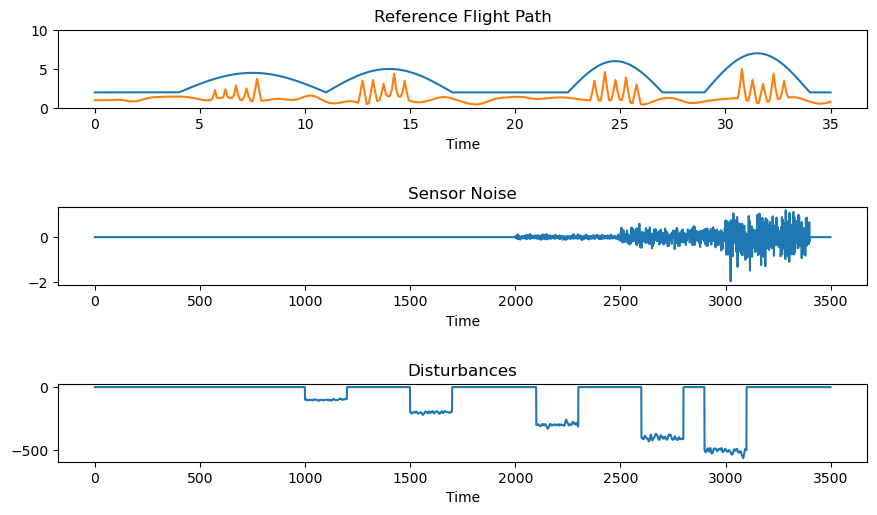

In [7]:
y = np.zeros((N2,numfiles))

P = ct.tf(0.45, [1, 0.15, 20.1, 0.51])
ii = 0
for K in controllers:
    L = P*K
    T = L/(1+L)
    S = 1/(1+L)
    t,yr = ct.forced_response(T,T=t2,U=r-2)
    t,yd = ct.forced_response(S*P, T=t2,U=d)
    t,yn = ct.forced_response(T,T=t2,U=n)

    y[:,ii] = yr + yd - yn + 2
    ii+=1


num_crashed = 0
crash_plane2 = np.interp(t2, t1, crash_plane)
crash_index = np.zeros(numfiles,dtype=int)
for ii in range(numfiles):
    crashed = False
    for jj in range(N2):
        if y[jj,ii] < crash_plane2[jj] or crashed:
            y[jj,ii] = -1
            if not crashed:
                crash_index[ii] = jj
            crashed = True
    if crashed:
        num_crashed += 1

print(y.shape)
fig3, ax3 = plt.subplots(3,1, figsize=(10,6))
fig3.tight_layout(pad=5.0)
ax3[0].plot(t2,r)
ax3[0].plot(t1,crash_plane)
#ax3[0].plot(t2,y)
ax3[0].set_title('Reference Flight Path')
ax3[0].set_ylim(0,10)
ax3[0].set_xlabel('Time')
ax3[1].plot(n)
ax3[1].set_title('Sensor Noise')
ax3[1].set_xlabel('Time')
ax3[2].plot(d)
ax3[2].set_title('Disturbances')
ax3[2].set_xlabel('Time')

Text(0.5, 36.72222222222221, 'Time')

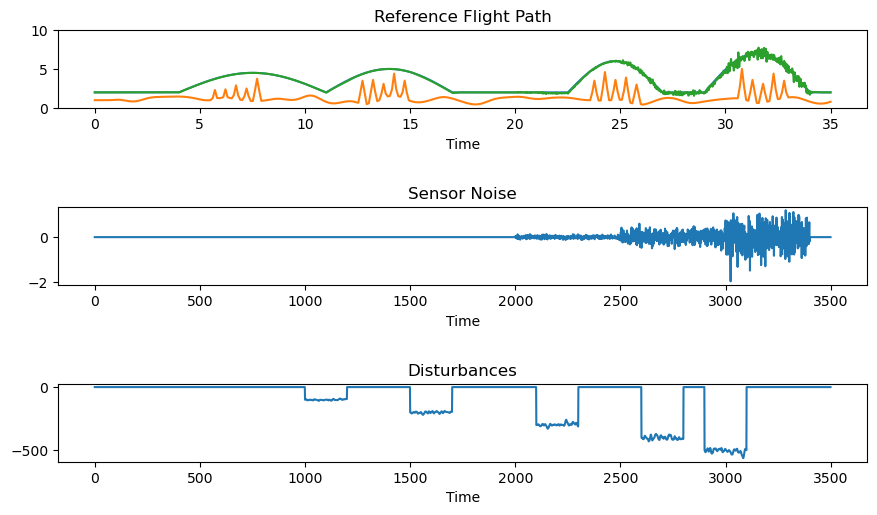

In [8]:
fig3, ax3 = plt.subplots(3,1, figsize=(10,6))
fig3.tight_layout(pad=5.0)
ax3[0].plot(t2,r)
ax3[0].plot(t1,crash_plane)
ax3[0].plot(t2,y)
ax3[0].set_title('Reference Flight Path')
ax3[0].set_ylim(0,10)
ax3[0].set_xlabel('Time')
ax3[1].plot(n)
ax3[1].set_title('Sensor Noise')
ax3[1].set_xlabel('Time')
ax3[2].plot(d)
ax3[2].set_title('Disturbances')
ax3[2].set_xlabel('Time')

In the following cell the movie is saved frame by frame. This might take a while to run (upwards of 5 min sometimes on my laptop). A file will be saved to your computer called 'assignment4Video_individual.mp4'.

In [9]:

ax.plot(t2,r,'w--', linewidth=3)

marker = []
explosion_time = np.zeros(numfiles)
with writer.saving(fig, "assignment4Video_individual.mp4", 100):
    for ii in range(N2+5*numfiles): #range((N-100)*10):
        for jj in range(len(marker)):
            marker[jj][0].remove()
        marker = []
        for jj in range(numfiles):
            if ii-5*jj >= 0 and ii-5*jj<N2:
                if y[ii-5*jj,jj] > 0: 
                    marker.append(ax.plot(t2[ii-5*jj],y[ii-5*jj,jj],'k4',markersize=10, markeredgewidth=3))
                    #marker.append(ax.scatter(t2[ii-5*jj],y[ii-5*jj,jj],marker='4',s=100,linewidth=3))                
                elif explosion_time[jj] < 10:
                    xx = t2[crash_index[jj]]+0.1*np.random.randn(1)
                    yy = y[crash_index[jj]-1,jj]+0.1*np.random.randn(1)
                    ax.plot(xx,yy,'ro',markersize=10+5*np.random.randn(1),alpha=0.5)
                    explosion_time[jj] += 1
                    

        if ii > 500 and ii < N2-500:
            ax.set_xlim((ii-500)/100,(ii-500)/100+10) 
        ax.set_ylim(0,10)
        writer.grab_frame()

This airplane has slightly different mass from that on the assignment (for which the controller was designed). Airplane flying through mountain ranges is hit by various storms. As the storms increase in severity, the sensor becomes iced over, providing noisy estimates. 


Run the following cell to play the movie in the notebook. The file is also saved on your computer by the previous cell, so you can play it through any software you like. 

In [10]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="assignment4Video_individual.mp4" type="video/mp4">
</video></div>""")